In [2]:
import pandas as pd
df = pd.read_excel("Online Retail.xlsx")

In [4]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df = pd.read_excel("Online Retail.xlsx")

df = df[["InvoiceDate","Quantity","UnitPrice"]]
df = df[(df["Quantity"] >0) & (df["UnitPrice"] >0)]

df["siparis_tutari"] = df["Quantity"] * df["UnitPrice"]
df["gun"] = df["InvoiceDate"].dt.day_name()

<Axes: title={'center': 'Günlere Göre Ortalama Sipariş Tutarı (Ortalama - Mean)'}, xlabel='gun'>

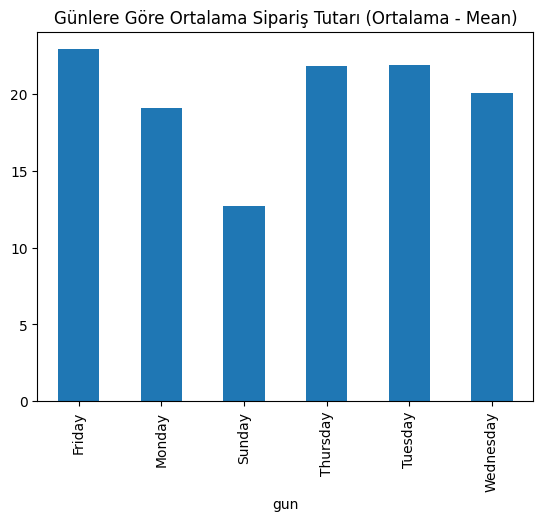

In [ ]:
# Ortalama
gunluk_ortalama = df.groupby("gun")["siparis_tutari"].mean()
gunluk_ortalama.plot(
    kind="bar",
    title="Günlere Göre Ortalama Sipariş Tutarı (Ortalama - Mean)"
)

<Axes: title={'center': 'Günlere Göre Ortalama ve Medyan Sipariş Tutarı Karşılaştırması'}, xlabel='gun'>

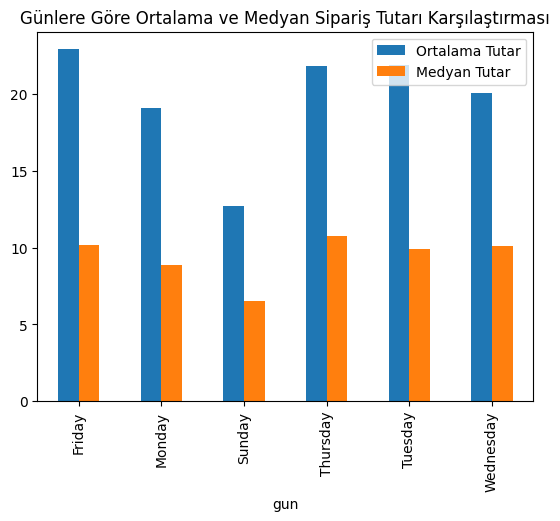

In [ ]:
# Medyan
gunluk_median = df.groupby("gun")["siparis_tutari"].median()
gunluk_karsilastirma = pd.DataFrame({
    "Ortalama Tutar": gunluk_ortalama,
    "Medyan Tutar": gunluk_median
})

gunluk_karsilastirma.plot(
    kind="bar",
    title="Günlere Göre Ortalama ve Medyan Sipariş Tutarı Karşılaştırması"
)

In [ ]:
# İşlem sayısı düşük günleri filtrele
gunluk_ozet = (
    df.groupby("gun")["siparis_tutari"]
    .agg(
        ortalama_tutar="mean",
        median_tutar="median",
        islem_sayisi="count"
    )
    .sort_values(by="islem_sayisi", ascending=False)
)

guvenilir_gunler = gunluk_ozet[gunluk_ozet["islem_sayisi"] > 1000]
print("Güvenilir Günlerin Özeti:")
guvenilir_gunler

Güvenilir Günlerin Özeti:


,ortalama_tutar,median_tutar,islem_sayisi
gun,,,
Thursday,21.811966,10.79,101007
Tuesday,21.904611,9.90,99460
Monday,19.107274,8.85,93136
Wednesday,20.052514,10.08,92315
Friday,22.923733,10.20,80281
Sunday,12.734960,6.50,63905


<Figure size 1000x500 with 0 Axes>

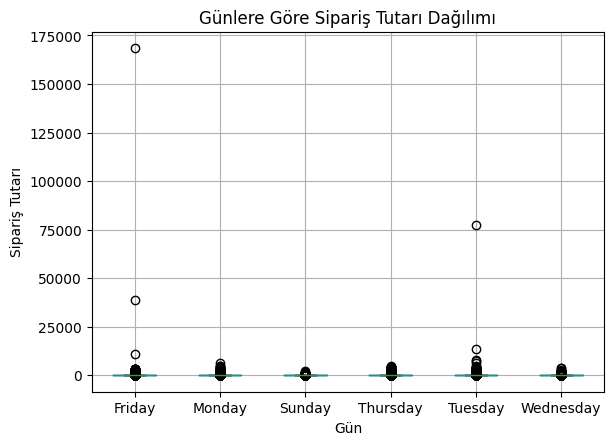

In [ ]:
# Aykırı değerler için kutu grafiği
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
df.boxplot(column="siparis_tutari", by="gun", showfliers=True)
plt.title("Günlere Göre Sipariş Tutarı Dağılımı")
plt.suptitle("")
plt.xlabel("Gün")
plt.ylabel("Sipariş Tutarı")
plt.show()

<Axes: title={'center': 'Günlere Göre Ortalama, Medyan ve Kırpılmış Ortalama Karşılaştırması'}, xlabel='gun'>

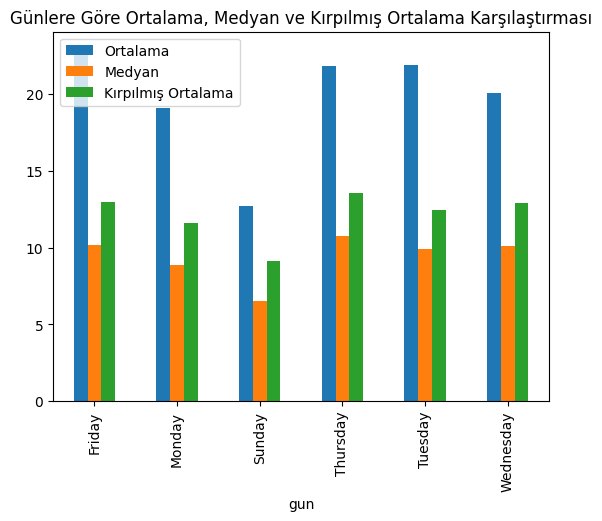

In [ ]:
# Kırpılmış Ortalama
from scipy.stats import trim_mean

gunluk_trimmed_mean = (
    df.groupby("gun")["siparis_tutari"]
    .apply(lambda x: trim_mean(x, 0.05))
)

karsilastirma_trim = pd.DataFrame({
    "Ortalama": gunluk_ortalama,
    "Medyan": gunluk_median,
    "Kırpılmış Ortalama": gunluk_trimmed_mean
})

karsilastirma_trim.plot(
    kind="bar",
    title="Günlere Göre Ortalama, Medyan ve Kırpılmış Ortalama Karşılaştırması"
)


Özetle:

- Ortalama, az sayıda yüksek tutarlı siparişten ciddi şekilde etkilenir.
- Medyan, tipik müşteri davranışını daha iyi temsil eder.
- İşlem sayısı, metriklerin ne kadar güvenilir olduğunu anlamak için kritik bir bağlam sağlar.
- Kırpılmış ortalama, uç değerlerin etkisini azaltarak daha dengeli bir özet sunar.